In [1]:
from MultivariateNormalDistribution import mvn
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture
import numpy as np
from sklearn import datasets
import math
from matplotlib.patches import Ellipse
import numpy.random as rnd

%matplotlib inline

# Plotting Helper Functions

In [2]:
#http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html
color_iter = itertools.cycle(['r', 'g', 'b', 'y',
                              'black'])

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 7, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.25)
        splot.add_artist(ell)

    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

# Testing the Implementation

In [3]:
print("======Creating Ground Truth=====\n")
dimensions = 4
mu = (np.random.uniform(0,1,dimensions)).reshape(dimensions,1)*20
print("Ground truth mu: \n{}".format(mu))
#covariance = datasets.make_spd_matrix(dimensions) #np.random.rand(dimensions,dimensions) # TODO gallery??
covariance = np.identity(dimensions)

MVN1 = mvn.MultivariateNormalDistribution(dimensions=dimensions, mean=mu, covariance=covariance, name="MVN1")

# Sample MVN1
N = 5
samples = MVN1.sampleDistribution(N)
print("samples: {}\n".format(samples))

print("\n======Setting parameters for MAP=====\n")

mvn_prior = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="mvn_prior")
mvn_prior.MLE(samples)

nu0 = N;
S_0 = np.multiply(np.diag(np.diag(mvn_prior.sigma)),nu0)
m_0 = mvn_prior.mu
kappa0 = N

print("\n======Creating MVN2(using MLE) and MVN3(using MAP)=====\n")

# Sample MVN1 again
N = 50
samples = MVN1.sampleDistribution(N)
# MVM2 will only do MLE
MVN2 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="MVN2");
# MVN3 will have a prior and do posterior analysis
MVN3 = mvn.MultivariateNormalDistribution(dimensions=dimensions, m0=m_0, S0=S_0 , kappa=kappa0, nu=nu0, name="MVN3")

MVN2.MLE(samples)
MVN3.MAP(samples)


print("\n=====Compute likelihood========\n")
N = 5
samples_test = MVN1.sampleDistribution(N)
print("samples_test: {}\n".format(samples_test))

lik1 = MVN1.logpdf(samples_test)
lik2 = MVN2.logpdf(samples_test)
lik3 = MVN3.logpdf(samples_test)
loglik1 = MVN1.loglikelihood(samples_test)
loglik2 = MVN2.loglikelihood(samples_test)
loglik3 = MVN3.loglikelihood(samples_test)
lik3_2 = MVN3.logPosteriorPredictive(samples_test)
loglik3_2 = np.sum(lik3_2)


print("likelihood of {}: \n{}".format(MVN1.name,lik1))
print("loglikelihood of {}: \n{}\n".format(MVN1.name,loglik1))
print("likelihood of {}: \n{}".format(MVN2.name,lik2))
print("loglikelihood of {}: \n{}\n".format(MVN2.name,loglik2))
print("likelihood of {}: \n{}".format(MVN3.name,lik3))
print("loglikelihood of {}: \n{}".format(MVN3.name,loglik3))
print("posterior predictive tstudent of {}: \n{}".format(MVN3.name, lik3_2))
print("loglikelihood of {}: \n{}".format(MVN3.name,loglik3_2))

======Creating Ground Truth=====

Ground truth mu: 
[[ 4.21470904]
 [ 8.22402223]
 [ 5.91462511]
 [16.38874547]]
samples: [[ 1.93920384  2.44324953  6.12793901  3.46903508  3.82188511]
 [ 9.05445139  7.78010919  9.29997495  9.00748856  9.06549145]
 [ 6.1768024   5.02442285  4.71712366  5.69208439  6.93801334]
 [15.42324312 14.58746332 16.82524083 17.622385   16.31048987]]


======Setting parameters for MAP=====


======Creating MVN2(using MLE) and MVN3(using MAP)=====


=====Compute likelihood========

samples_test: [[ 5.0304944   4.19568093  4.27357249  5.49158496  4.17297393]
 [ 5.96565239  8.6761127   7.49540994  8.08451938  8.97128342]
 [ 5.13502708  4.53937383  6.89610256  6.1149584   6.4875363 ]
 [18.0422865  17.44586577 17.36686595 17.10023222 16.55290691]]

likelihood of MVN1: 
[[-8.2296097 ]
 [-5.28253778]
 [-4.90293335]
 [-4.77386413]
 [-4.13341279]]
loglikelihood of MVN1: 
-27.32235775861301

likelihood of MVN2: 
[[-8.03984171]
 [-5.82683411]
 [-4.66283875]
 [-4.85763018]
 [

# Testing the implementation with the iris dataset

# TODO
- take 1 datapoint and put it into all 3 mles. get the logpdf and the one 
with the highest logprob is the category it belongs to

=====================type 1================================
mu_type_1:
[[5.0375]
 [3.44  ]]
logpdf_type_1:
[[ 0.55239429]
 [-5.26949267]
 [-1.47695181]
 [ 0.55239429]
 [-0.25354511]
 [-0.19473364]
 [-0.25354511]
 [-0.19374826]
 [ 0.32351011]
 [ 0.51104301]]
likelihood_type_1:
0.0033370273020274306
loglikelihood_type_1:
-5.702674897637909
=====================type 2================================
mu_type_2:
[[6.01]
 [2.78]]
logpdf_type_2:
[[-0.41251194]
 [-0.16366395]
 [-0.08495801]
 [-1.99225925]
 [-0.2532239 ]
 [-0.7248035 ]
 [-0.39537342]
 [-0.01277828]
 [-1.474835  ]
 [-0.18882499]]
likelihood_type_2:
0.0033351679485225725
loglikelihood_type_2:
-5.703232241505485
=====================type 3================================
mu_type_3:
[[6.6225]
 [2.96  ]]
logpdf_type_3:
[[-0.30668696]
 [-0.33002325]
 [-0.9799198 ]
 [-0.47837877]
 [-0.82836602]
 [-0.2223177 ]
 [-1.19390785]
 [-0.25733504]
 [-2.12189877]
 [-1.04561196]]
likelihood_type_3:
0.00042456471122346553
loglikelihood_type_3:
-7

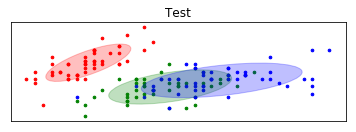

loglik_test: 0.7358809285394375
loglik_test: 0.6619852955798243


In [4]:
iris = datasets.load_iris()
X = iris.data # Features
y = iris.target # Targets

dimensions = 2

# Only take 2 dimensions
X = X[:,range(0,dimensions)]

# Generate training and test data for first type of iris
X_type_1 = X[y==0]
y_type_1 = y[y==0]
X_type_1_train = np.transpose(X_type_1[range(0,40),:])
X_type_1_test = np.transpose(X_type_1[range(40,50),:])


X_type_2 = X[y==1]
X_type_2_train = np.transpose(X_type_2[range(0,40),:])
X_type_2_test = np.transpose(X_type_2[range(40,50),:])

X_type_3 = X[y==2]
X_type_3_train = np.transpose(X_type_3[range(0,40),:])
X_type_3_test = np.transpose(X_type_3[range(40,50),:])

print("=====================type 1================================")
mvn_type_1 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="type1")
mvn_type_1.MLE(X_type_1_train)
logpdf_type_1 = mvn_type_1.logpdf(X_type_1_test)
likelihood_1 = mvn_type_1.likelihood(X_type_1_test)
log_likelihood_1 = mvn_type_1.loglikelihood(X_type_1_test)

print("mu_type_1:\n{}".format(mvn_type_1.mu))
print("logpdf_type_1:\n{}".format(logpdf_type_1))
print("likelihood_type_1:\n{}".format(likelihood_1))
print("loglikelihood_type_1:\n{}".format(log_likelihood_1))

print("=====================type 2================================")
mvn_type_2 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="type2")
mvn_type_2.MLE(X_type_2_train)
logpdf_type_2 = mvn_type_2.logpdf(X_type_2_test)
likelihood_2 = mvn_type_2.likelihood(X_type_2_test)
log_likelihood_2 = mvn_type_2.loglikelihood(X_type_2_test)

print("mu_type_2:\n{}".format(mvn_type_2.mu))
print("logpdf_type_2:\n{}".format(logpdf_type_2))
print("likelihood_type_2:\n{}".format(likelihood_2))
print("loglikelihood_type_2:\n{}".format(log_likelihood_2))
print("=====================type 3================================")
mvn_type_3 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="type3")
mvn_type_3.MLE(X_type_3_train)
logpdf_type_3 = mvn_type_3.logpdf(X_type_3_test)
likelihood_3 = mvn_type_3.likelihood(X_type_3_test)
log_likelihood_3 = mvn_type_3.loglikelihood(X_type_3_test)

print("mu_type_3:\n{}".format(mvn_type_3.mu))
print("logpdf_type_3:\n{}".format(logpdf_type_3))
print("likelihood_type_3:\n{}".format(likelihood_3))
print("loglikelihood_type_3:\n{}".format(log_likelihood_3))

# Plot Gaussian Mixture Model Ellipsoids
means = [mvn_type_1.mu, mvn_type_2.mu, mvn_type_3.mu]
covariance = [mvn_type_1.sigma, mvn_type_2.sigma, mvn_type_3.sigma]
plot_results(X, y, means, covariance,1, 'Test')

plt.show()

# Old Plot
#fig = plt.figure()
#ax = fig.add_subplot(211, aspect='equal')
#X_01, X_02 = X_type_1_train[0, :], X_type_1_train[1,:]
#X_11, X_12 = X_type_2_train[0, :], X_type_2_train[1,:]
#X_21, X_22 = X_type_3_train[0, :], X_type_3_train[1,:]

#plt.scatter(X_01, X_02, color='r')
#plt.scatter(X_11, X_12, color='b')
#plt.scatter(X_21, X_22, color='g')

dat = np.transpose(X_type_3_test)[0].reshape(dimensions,1)
print("loglik_test: {}".format(mvn_type_3.likelihood(dat)))
dat = np.transpose(X_type_2_test)[0].reshape(dimensions,1)
print("loglik_test: {}".format(mvn_type_2.likelihood(dat)))

